## Data Preprocessing/Exploratory Data Analysis for the Poisonous Mushrooms Code



### Dataset Analysis

In [2]:
#Loading the data into a dataframe

import csv
import pandas as pd
import matplotlib.pyplot as plt

#Importing a limited section of the dataset for now for easier processing
df = pd.read_csv("poisonous_mushrooms.csv", nrows=2000)
# Source: https://www.kaggle.com/datasets/davinascimento/poisonous-mushrooms?resource=download
# this assumes that you have the csv downloaded and stored in the same directory as this file

# Iterates through the columns, prints out counts of each data for each column
for column in df:
	df_series = df[column]
	results = df_series.value_counts()
	print("Results for column: ", column)
	print(results)
	print("Missing: ", df_series.isnull().sum(), "\n")

# results will be looked at more carefully in below cells, so don't worry about scrolling




Results for column:  id
id
0       1
1329    1
1342    1
1341    1
1340    1
       ..
661     1
660     1
659     1
658     1
1999    1
Name: count, Length: 2000, dtype: int64
Missing:  0 

Results for column:  class
class
p    1118
e     882
Name: count, dtype: int64
Missing:  0 

Results for column:  cap-diameter
cap-diameter
1.52     9
1.43     8
1.49     8
3.77     8
3.84     8
        ..
1.18     1
13.55    1
5.27     1
11.61    1
11.65    1
Name: count, Length: 945, dtype: int64
Missing:  0 

Results for column:  cap-shape
cap-shape
x    936
f    413
s    232
b    219
p     76
o     62
c     62
Name: count, dtype: int64
Missing:  0 

Results for column:  cap-surface
cap-surface
t        303
s        249
y        199
h        184
g        168
d        132
e         90
k         71
i         63
w         62
l         36
15.94      1
Name: count, dtype: int64
Missing:  442 

Results for column:  cap-color
cap-color
n    875
w    254
y    221
g    160
e    138
o    109
p     57
u   

Focusing first on the counts of different attributes in the categorical cells...

First is the poisonous or edible attribute (p = poisonous, e = edible)

This is the target data. As the results below show, about 55% of this subsample (when N = 2000) is poisonous, which is relatively balanced

In [3]:
print(df["class"].value_counts())

class
p    1118
e     882
Name: count, dtype: int64


Cap Data:

Labels from the Kaggle dataset

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s, oval=o

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s, l: silky

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, black=k


These seem like they would make good features (at least in terms of data quality)


In [4]:
for cat in ["cap-shape", "cap-surface", "cap-color"]:
	print(df[cat].value_counts())
	print("Missing: ", df_series.isnull().sum(), "\n")


#Results suggest solid mix of cap shapes and surface types; might need to sample from shape and color data to balance the input sets

cap-shape
x    936
f    413
s    232
b    219
p     76
o     62
c     62
Name: count, dtype: int64
Missing:  0 

cap-surface
t        303
s        249
y        199
h        184
g        168
d        132
e         90
k         71
i         63
w         62
l         36
15.94      1
Name: count, dtype: int64
Missing:  0 

cap-color
n    875
w    254
y    221
g    160
e    138
o    109
p     57
u     50
r     50
b     38
k     32
l     16
Name: count, dtype: int64
Missing:  0 



cap-diameter:

In [5]:
print(df["cap-diameter"].describe())
print("Missing: ", df_series.isnull().sum(), "\n")

count    2000.000000
mean        6.177930
std         4.192656
min         0.510000
25%         3.267500
50%         5.710000
75%         8.252500
max        55.940000
Name: cap-diameter, dtype: float64
Missing:  0 



gill data:

All categories, summaries below. Some are missing attributes:

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

In [6]:

for column in ["gill-attachment", "gill-spacing", "gill-color"]:
	df_series = df[column]
	print(column)
	print("Missing: ", df_series.isnull().sum(), "\n")

gill-attachment
Missing:  328 

gill-spacing
Missing:  851 

gill-color
Missing:  0 



Gill spacing missing enough data that it would probably be simpler to ignore it

Stem Data:

In [7]:
for column in ["stem-width", "stem-height"]:
	df_series = df[column]
	print(column)
	print(df_series.describe())
	zeros = df_series.value_counts().get(0.0)
	print("Missing: ", zeros, "\n")


stem-width
count    2000.000000
mean       11.088920
std         8.002323
min         0.000000
25%         4.967500
50%         9.560000
75%        15.777500
max        57.210000
Name: stem-width, dtype: float64
Missing:  1 

stem-height
count    2000.000000
mean        6.412225
std         2.852064
min         0.000000
25%         4.610000
50%         5.870000
75%         7.560000
max        25.930000
Name: stem-height, dtype: float64
Missing:  1 



Other relevant data:
does-bruise-or-bleed
has-ring

Imbalanced features, but not too hard to clean


Spore color, Veil Color, and Veil Type has more missing entries than filled, so those will likely be ignored

### Correlation Analysis

Several of the attributes are continous values, so we can find the correlation between them

      poisonous  cap-diameter  stem-width  stem-height
0             0          8.80       15.39         4.51
1             1          4.51        6.48         4.79
2             0          6.94        9.93         6.85
3             0          3.88        6.53         4.16
4             0          5.85        8.36         3.37
...         ...           ...         ...          ...
1995          1          0.76        1.01         4.33
1996          0          7.93       13.24         7.39
1997          1          0.99        1.43         2.99
1998          0          1.83        4.17         5.75
1999          1         11.65       26.79         5.89

[2000 rows x 4 columns]


c:\Users\Philip Kvamme\.conda\envs\ecs171\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Philip Kvamme\AppData\Local\Temp\ipykernel_12960\1297697850.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


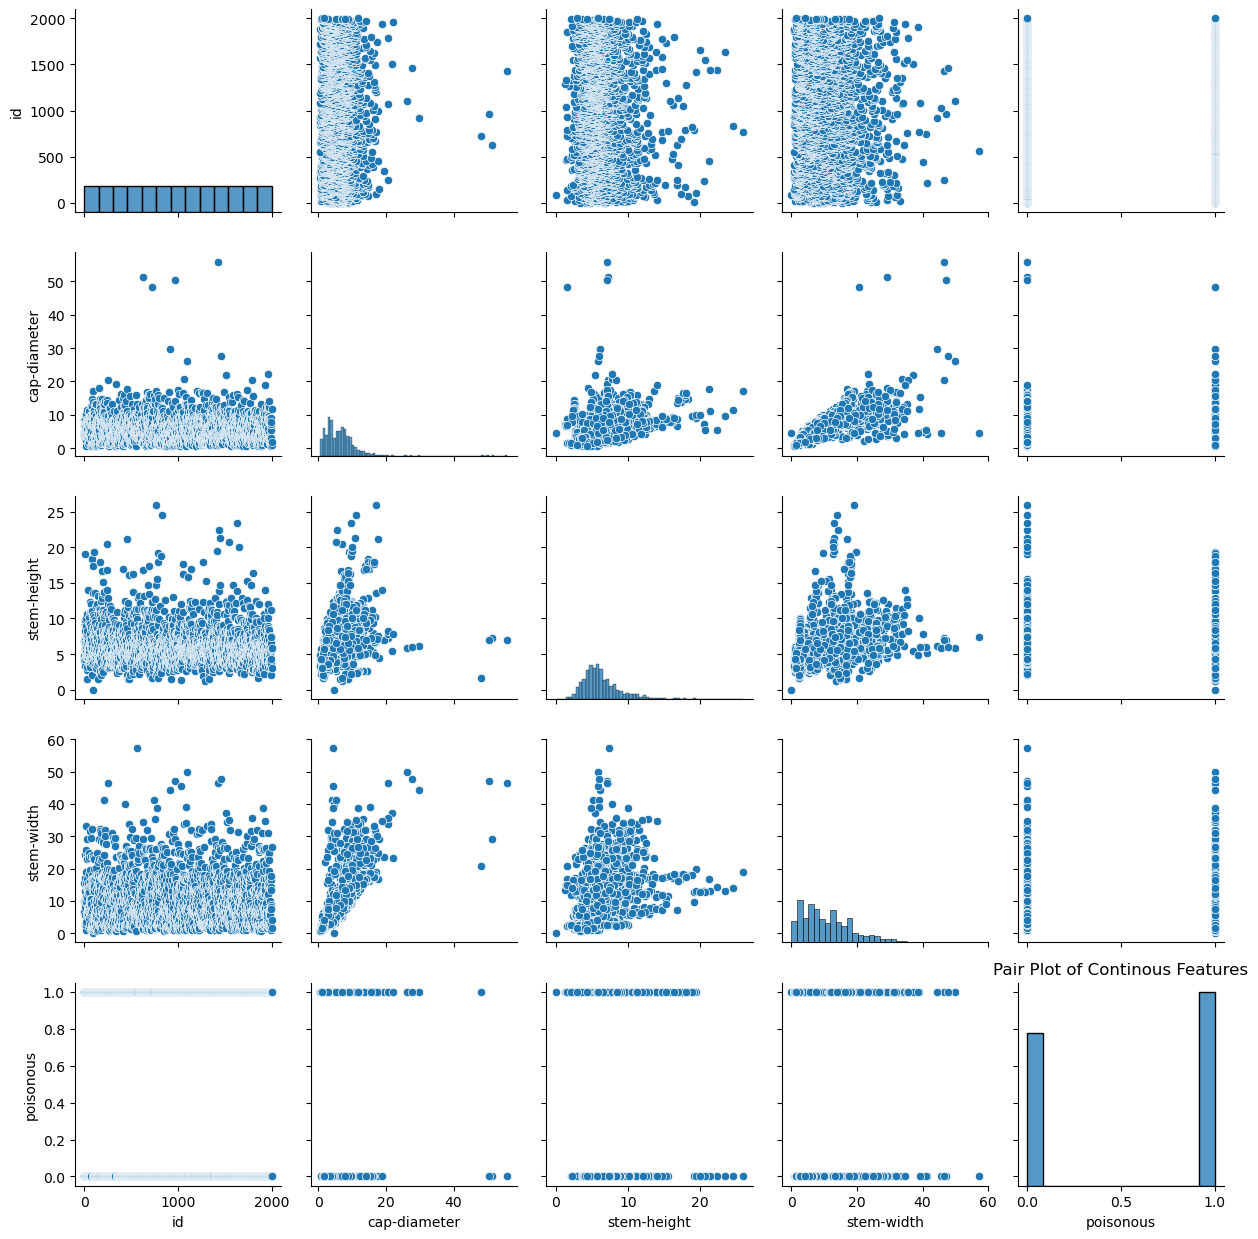

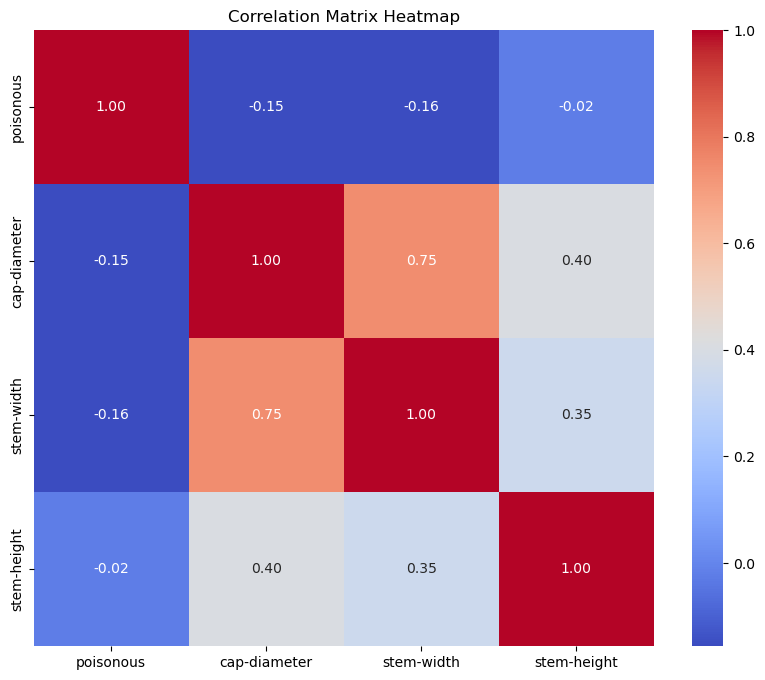

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Map poisionous or not to an integer
mapping = {'p': 1, 'e': 0}
df_r = df["class"].map(mapping)

# Rename target feature to "poisionous" in the dataframe
df_r.rename({"class": "poisonous"})
df["poisonous"] = df_r
df.drop("class", axis=1)
df.drop("id", axis=1)

# Create a heatmap for the correlation matrix
continuousFeatures = ["poisonous", "cap-diameter", "stem-width", "stem-height"]
dfC = df[continuousFeatures]
print(dfC)

# from Lab 0
# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df)
plt.title('Pair Plot of Continous Features')
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = dfC.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


These results suggest that all three of these continous variables are not directly correlated with the poisonous attribute. Outliers have yet to be handled, so this might need to be rerun to ensure that this isn't affecting the numbers.

As for the categorical data, we can simply look at the counts of how many of each label are poisonous or not to try to get a feel for which features matter.


For example, the following code looks at cap shape.

   cap-shape  poisonous  count
0          b          0     42
1          b          1    177
2          c          0     34
3          c          1     28
4          f          0    203
5          f          1    210
6          o          0     16
7          o          1     46
8          p          0     38
9          p          1     38
10         s          0    112
11         s          1    120
12         x          0    437
13         x          1    499


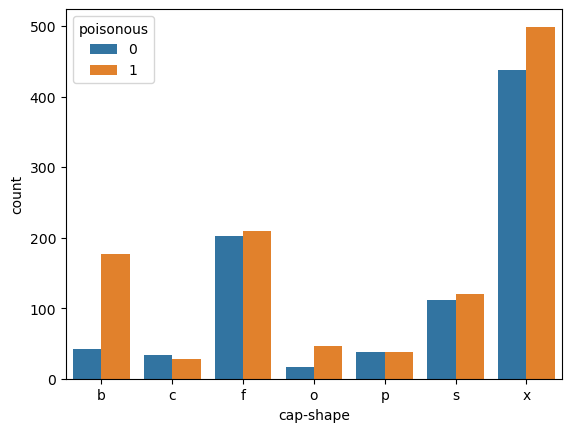

In [72]:
def countFeatureAndPoisonousCases(df, feature, printTable=False):
	features = [feature, "poisonous"]
	df_T = df[features]
	df_T = df_T.groupby(feature)["poisonous"].value_counts().sort_index()
	df_T = df_T.to_frame().reset_index()
	print(df_T)
	sns.barplot(x=df_T[feature], y=df_T["count"], hue=df_T["poisonous"])
	plt.show()

countFeatureAndPoisonousCases(df, "cap-shape", printTable=True)


Still working on a way to 